--------------------------------------------
--------------------------------------------
.: Dataset Info :.
********************
Total Rows: 150
Total Columns: 5
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1).: Target Variable After Encoding :.
*************************************
.:. Train Test Info .:.
*************************
>> Train Set
	.: Total data in train set: 120
	.: Total target data in train set: 120
	.: Total column in train set: 4

>> Test Set
	.: Total data in test set: 30
	.: Total target data in test set: 30
	.: Total

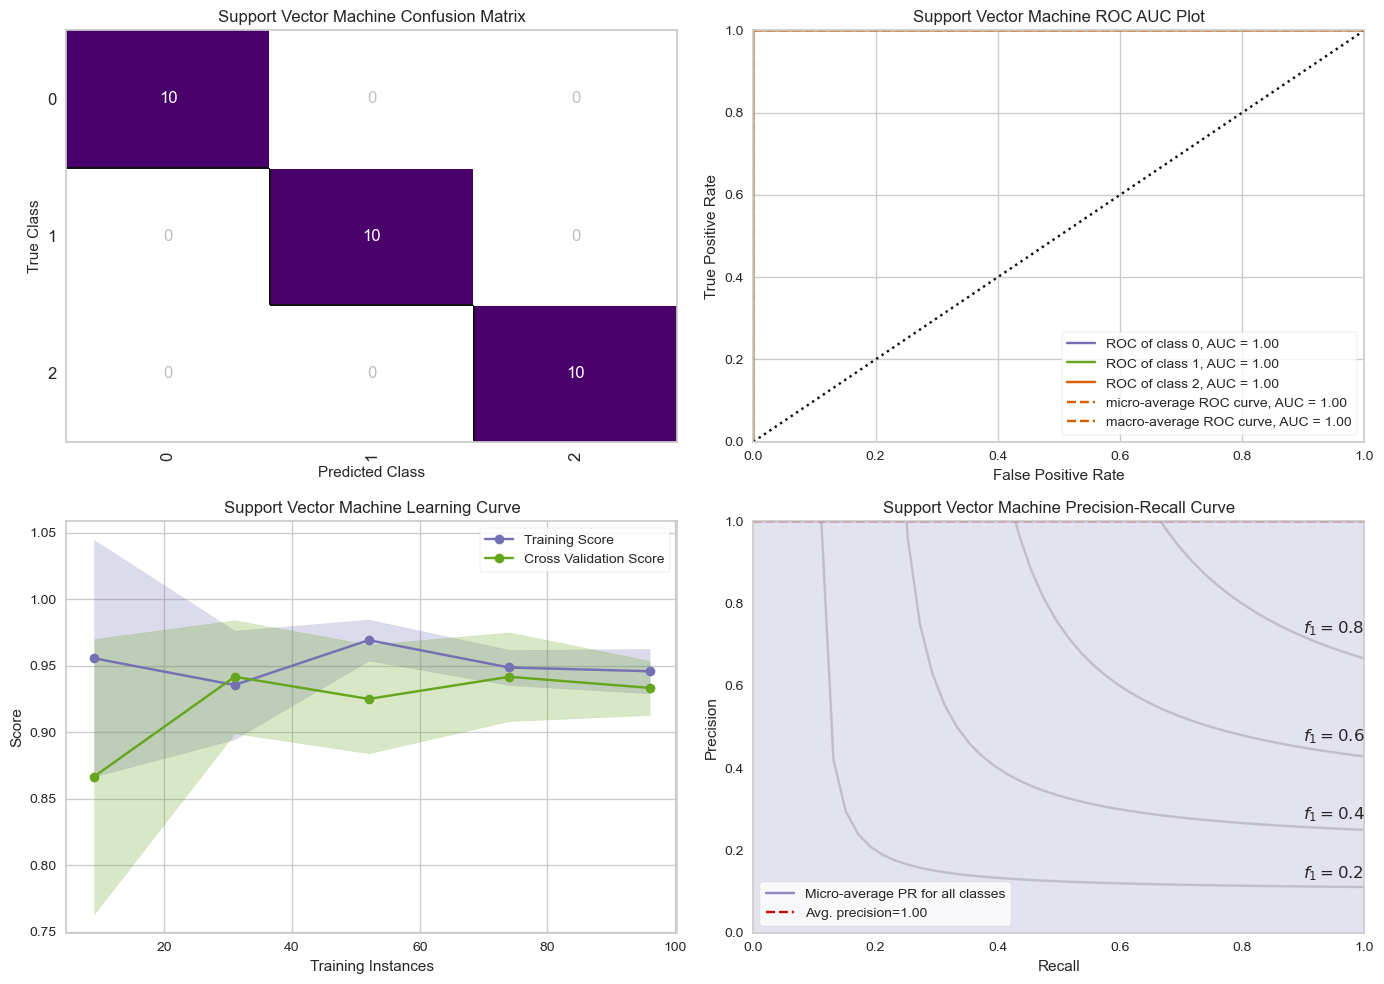

In [24]:
# --- Importing Libraries ---
!pip install session-info
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import yellowbrick

from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

import session_info
session_info.show()

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
set_palette('dark')
plt.rcParams['figure.dpi'] = 100
olcum = ( "manhattan" , "euclidean" )

print("--------------------------------------------")

# --- Create List of Color Palletes ---
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
color_mix = ['#29066B', '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

print("--------------------------------------------")
def read_file(url):
    url = url + "?raw=true"
    df = pd.read_csv(url)
    return df
url = "https://github.com/FurkanBulut00/FurkanBulutDeploy/blob/main/IRIS.csv"

# --- Importing Dataset ---
dataset = read_file(url)

# --- Reading Dataset ---
dataset.head().style.background_gradient(cmap = 'Purples').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

# --- Print Dataset Info ---
print('\033[35m\033[1m'+'.: Dataset Info :.')
print('\033[0m\033[35m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[35m\033[1m', dataset.shape[0])
print('\033[0m'+'Total Columns:'+'\033[35m\033[1m', dataset.shape[1])
print('\033[0m\033[35m*' * 20)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.')
print('\033[0m\033[35m*' * 22 +'\033[0m')
dataset.info(memory_usage = False)


# --- Seperating Dependent Features ---
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# --- Perform Label Encoding ---
le = LabelEncoder()
y = le.fit_transform(y)
# --- Label Encoding Mappings ---
idx = [0, 1, 2]
print('\033[35m\033[1m'+'.: Target Variable After Encoding :.')
print('\033[0m\033[35m*' * 37)
pd.DataFrame({'Label': idx, 'Target': le.classes_}, columns = ['Label', 'Target']).style.background_gradient(cmap = 'Purples').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

# --- Splitting Dataset into 80:20 w/ Stratified Random Sampling ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)


# --- Print Train Test Info ---
print('\033[35m\033[1m'+'.:. Train Test Info .:.')
print('\033[0m\033[35m*' * 25)
print('\033[35m\033[1m'+'>> Train Set')
print('\t\033[0m'+'.: Total data in train set:'+'\033[35m\033[1m', X_train.shape[0])
print('\t\033[0m'+'.: Total target data in train set:'+'\033[35m\033[1m', y_train.shape[0])
print('\t\033[0m'+'.: Total column in train set:'+'\033[35m\033[1m', X_train.shape[1])
print('\n\033[35m\033[1m'+'>> Test Set')
print('\t\033[0m'+'.: Total data in test set:'+'\033[35m\033[1m', X_test.shape[0])
print('\t\033[0m'+'.: Total target data in test set:'+'\033[35m\033[1m', y_test.shape[0])
print('\t\033[0m'+'.: Total column in test set:'+'\033[35m\033[1m', X_test.shape[1])

# --- Applying SVM ---
SVMclassifier = SVC()
SVMclassifier.fit(X_train, y_train)

y_pred_SVM = SVMclassifier.predict(X_test)

# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[35m\033[1m {:.2f}%'.format(SVMAcc*100)+' \033[0m.:.')

# --- SVM Classification Report ---
print('\033[35m\033[1m\n.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\033[35m\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax = ax1, cmap = 'RdPu', title = 'Support Vector Machine Confusion Matrix')
svmmatrix.fit(X_train, y_train)
svmmatrix.score(X_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, ax = ax2, title = 'Support Vector Machine ROC AUC Plot')
svmrocauc.fit(X_train, y_train)
svmrocauc.score(X_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax = ax3, title = 'Support Vector Machine Learning Curve')
svmlc.fit(X_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax = ax4, ap_score = True, iso_f1_curves = True,
                                title = 'Support Vector Machine Precision-Recall Curve')
svmcurve.fit(X_train, y_train)
svmcurve.score(X_test, y_test)
svmcurve.finalize()

plt.tight_layout();



